# Центральная предельная теорема 

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as s

import pandas as pd
import numpy as np

%matplotlib inline

In [17]:
SIZE = 1000
par1 = 0.02
par2 = 0.89
BINS = 40
n = [10, 50, 500]
it = iter([0, 1, 2])

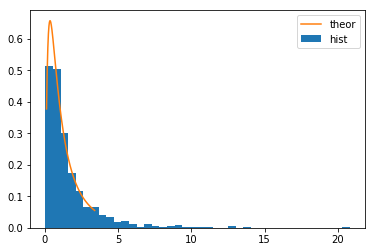

In [18]:
# create distrib 
randomVals = s.gilbrat()

# create plot parameters 
x = np.linspace(randomVals.ppf(par1), \
                randomVals.ppf(par2), \
                SIZE)
y = randomVals.pdf(x)

# plot graphs 
selection = randomVals.rvs(size=SIZE)

plt.hist(selection, \
         bins=BINS, \
         normed=True, \
         label='hist')

plt.plot(x, y, label='theor')

plt.legend()

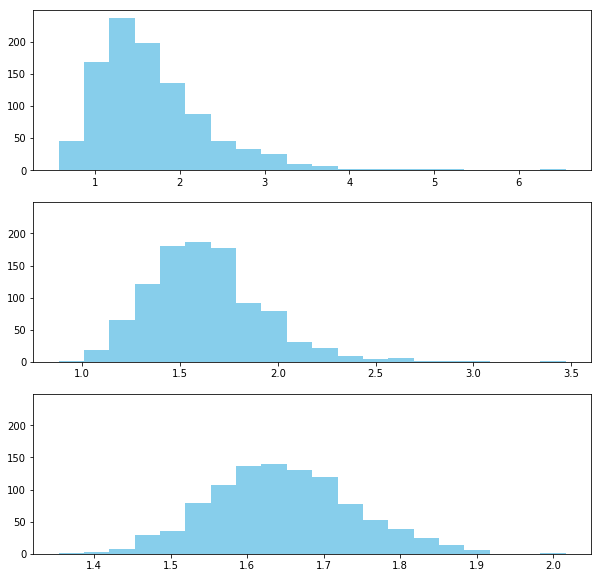

In [19]:
fig, ax = plt.subplots(3, 1, 
                       sharey=True, 
                       figsize=(10, 10))

disps = []
means = []

for i in n:
    selMean = np.array([randomVals.rvs(size=i).mean() for j in range(SIZE)])
    
    mean = selMean.mean()
    disp = selMean.std()**2
    
    means.append(mean)
    disps.append(disp)
    
    l = next(it)
    
    ax[l].hist(selMean, 
               bins=20, 
               color = "skyblue")

mu:1.6487212707
disp/N: [ 0.46707743  0.09341549  0.00934155]
err mu: [ 1.00244352  0.84775919  0.08866664]
err disp:[ 0.808681    0.09566993  0.01344256]


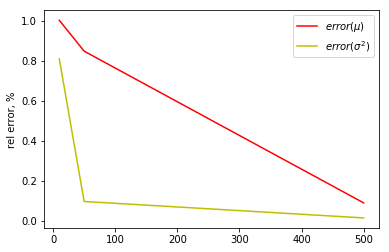

In [20]:
mu, disper = s.gilbrat.stats(loc=0, scale=1, moments='mv')

N = np.array(n)
disp = np.array(disp)
means = np.array(means)
err_mu = np.abs((means - mu) / mu * 100)
err_disp = np.abs((disps - disper/N) / disper * 100)

print "mu:" + str(mu)
print "disp/N: " + str(disper / N)
print "err mu: " + str(err_mu)
print "err disp:" + str(err_disp)

plt.plot(N, 
         err_mu, 
         '-', 
         label="$error(\mu)$", 
         color = 'r')

plt.plot(N, 
         err_disp,
         '-', 
         label="$error(\sigma^2)$",
         color = 'y')

plt.ylabel('rel error, %')
plt.legend()

Вывод: с увеличением размера выборки $n$ точность аппроксимации распределения выборочных средних увеличивается.